In [1]:
import platform
print('python: '+platform.python_version())
import numpy as np
print('numpy: '+np.__version__)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
import pandas as pd


python: 3.8.5
numpy: 1.19.2
matplotlib: 3.3.2


Uploading data

In [2]:
hdf=pd.HDFStore('C:\\Users\\leon-\\Documents\\Tesis\\Codigo\\test.h5', mode='r')
hdf.keys()

['/', '/table']

In [3]:
df=hdf.get('/table')
df=df.reset_index()
df=df.drop(['index'],axis=1)
df

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
0,218.364243,-172.341858,110.129105,-76.503624,153.661118,-111.320465,93.167969,-50.390713,76.708054,-56.523701,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
1,122.238762,26.738468,-91.613998,76.382225,121.227135,17.644758,-93.015450,75.715302,90.420105,21.377417,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
2,383.772308,-97.906456,79.640709,-362.426361,200.625992,-54.921326,37.994343,-189.184753,123.247223,-33.828953,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
3,132.492752,-77.763947,-87.322601,-62.304600,83.946594,-49.450481,-53.823605,-41.288010,28.072624,-19.964916,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
4,730.786987,-209.120010,-193.454315,-672.973877,225.477325,-75.363350,-66.226990,-201.926651,217.040192,-63.698189,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403995,169.716614,-122.102844,36.656090,112.031059,112.158615,-80.692657,24.224476,74.036636,86.687820,-60.876274,...,0.0,0.0,0.0,0.0,832.899963,-572.147461,249.778381,524.242310,1,1
403996,287.591492,-81.565056,-140.493576,237.313202,160.357544,-34.246628,-88.843933,129.028931,105.006508,-30.313942,...,0.0,0.0,0.0,0.0,1014.205322,-213.806396,-476.465851,852.417358,1,1
403997,91.996681,60.538616,-63.476665,27.734055,93.122139,60.690456,-61.697636,34.377369,67.617706,33.402180,...,0.0,0.0,0.0,0.0,659.905701,419.718506,-414.999115,239.802658,1,1
403998,132.474686,35.062359,125.736656,22.593466,61.466259,7.588309,55.307018,25.722607,53.369095,17.563345,...,0.0,0.0,0.0,0.0,659.797302,39.736858,593.325745,230.296585,1,1


Dataset 40x40

In [4]:
dftrain=df.iloc[0:30000].reset_index()
dftrain=dftrain.drop(['index'],axis=1)
dftest=df.iloc[30000:40000].reset_index()
dftest=dftest.drop(['index'],axis=1)
dfval=df.iloc[40000:50000].reset_index()
dfval=dfval.drop(['index'],axis=1)
dftrain

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
0,218.364243,-172.341858,110.129105,-76.503624,153.661118,-111.320465,93.167969,-50.390713,76.708054,-56.523701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,122.238762,26.738468,-91.613998,76.382225,121.227135,17.644758,-93.015450,75.715302,90.420105,21.377417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,383.772308,-97.906456,79.640709,-362.426361,200.625992,-54.921326,37.994343,-189.184753,123.247223,-33.828953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,132.492752,-77.763947,-87.322601,-62.304600,83.946594,-49.450481,-53.823605,-41.288010,28.072624,-19.964916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,730.786987,-209.120010,-193.454315,-672.973877,225.477325,-75.363350,-66.226990,-201.926651,217.040192,-63.698189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,107.598961,-86.493256,-37.625134,51.776459,83.556297,-69.174370,-35.723881,30.337543,69.006447,-53.915443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29996,40.411552,35.681664,15.854855,-10.418072,41.870693,28.990129,23.265043,-19.273426,33.280991,24.119259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29997,247.267456,18.934837,-119.225204,-215.796234,139.735626,9.669763,-66.933296,-122.280319,130.134888,9.838408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29998,230.381836,114.787895,91.257820,177.683823,177.950272,87.036385,67.774910,139.633560,139.115097,67.835197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


Labels

In [5]:
labeltr=dftrain
labeltr=np.asarray(labeltr.loc[:,'is_signal_new'])
labelte=dftest
labelte=np.asarray(labelte.loc[:,'is_signal_new'])
labelval=dfval
labelval=np.asarray(labelval.loc[:,'is_signal_new'])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
np.save('labeltr',labeltr)
np.save('labelte',labelte)
np.save('labelval',labelval)

Train set is_signal_new
0    15080
1    14920
dtype: int64
Test set is_signal_new
0    5020
1    4980
dtype: int64
Val set is_signal_new
0    5120
1    4880
dtype: int64


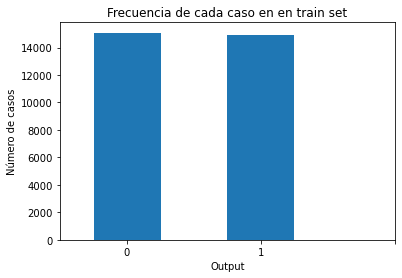

In [6]:
print('Train set', dftrain.groupby('is_signal_new').size())
print('Test set', dftest.groupby('is_signal_new').size())
print('Val set', dfval.groupby('is_signal_new').size())
clases = pd.value_counts(dftrain['is_signal_new'], sort = True)
clases.plot(kind = 'bar', rot=0)
plt.xticks(range(3))
plt.title("Frecuencia de cada caso en en train set")
plt.xlabel("Output")
plt.ylabel("Número de casos");

In [7]:
A=[]
for j in range(30000):
    n=np.zeros(shape=40)
    phi=np.zeros(shape=40)
    En=np.zeros(shape=40)
   # if (j>5000):
    #    j=j+202000
        
    for i in range(40):
        df1 = dftrain.iloc[j:j+1,[0+4*i,1+4*i,2+4*i,3+4*i]]
        #print(df1)
        Px=df1.iloc[0][1]
        Py=df1.iloc[0][2]
        Pz=df1.iloc[0][3]
        E=df1.iloc[0][0]
        P=np.sqrt(Px**2+Py**2+Pz**2)
        if (P!=0):
            theta=np.arccos(Pz/P)
            n[i]=-np.log(np.tan(theta/2))
            if (n[i]<-2):
                n[i]=-2
            if (n[i]>2):
                n[i]=2
        else:
            n[i]=np.nan
        if (Px!=0):
            phi[i]=np.arctan(Py/Px)
        else:
            phi[i]=np.nan
        if (E!=0):
            En[i]=E
        else:
            En[i]=np.nan
    n1=n+2
    phi1=phi+(100*np.pi)/180
    #Fitting each couple n-phi into one of our 200x200 pixels 
    n2=n1//.0870
    phi2=phi1//(np.pi/36)
    En1=np.zeros(shape=1600).reshape(40,40)
    
    for h in range(40):
        if (np.isnan(En[h])==False):
            g=int(phi2[h])
            k=int(n2[h])
            if (g<40 and k<40):
                if (En1[g][k]<En[h]):
                    En1[g][k]=En[h]
    
    A.append(En1)
Arr=np.asarray(A)
Arr.shape

<ipython-input-7-727ee8623d68>:37: RuntimeWarning: invalid value encountered in floor_divide
  n2=n1//.0870
<ipython-input-7-727ee8623d68>:38: RuntimeWarning: invalid value encountered in floor_divide
  phi2=phi1//(np.pi/36)


(30000, 40, 40)

In [12]:
np.save('Datatrain',Arr)

In [8]:
B=[]
for j in range(10000):
    n=np.zeros(shape=40)
    phi=np.zeros(shape=40)
    En=np.zeros(shape=40)
   # if (j>5000):
    #    j=j+202000
        
    for i in range(40):
        df1 = dftest.iloc[j:j+1,[0+4*i,1+4*i,2+4*i,3+4*i]]
        #print(df1)
        Px=df1.iloc[0][1]
        Py=df1.iloc[0][2]
        Pz=df1.iloc[0][3]
        E=df1.iloc[0][0]
        P=np.sqrt(Px**2+Py**2+Pz**2)
        if (P!=0):
            theta=np.arccos(Pz/P)
            n[i]=-np.log(np.tan(theta/2))
            if (n[i]<-2):
                n[i]=-2
            if (n[i]>2):
                n[i]=2
        else:
            n[i]=np.nan
        if (Px!=0):
            phi[i]=np.arctan(Py/Px)
        else:
            phi[i]=np.nan
        if (E!=0):
            En[i]=E
        else:
            En[i]=np.nan
    n1=n+2
    phi1=phi+(100*np.pi)/180
    #Fitting each couple n-phi into one of our 200x200 pixels 
    n2=n1//.0870
    phi2=phi1//(np.pi/36)
    En1=np.zeros(shape=1600).reshape(40,40)
    
    for h in range(40):
        if (np.isnan(En[h])==False):
            g=int(phi2[h])
            k=int(n2[h])
            if (g<40 and k<40):
                if (En1[g][k]<En[h]):
                    En1[g][k]=En[h]
    
    B.append(En1)
Arrtest=np.asarray(B)
Arrtest.shape

<ipython-input-8-ed3f4fddb41c>:37: RuntimeWarning: invalid value encountered in floor_divide
  n2=n1//.0870
<ipython-input-8-ed3f4fddb41c>:38: RuntimeWarning: invalid value encountered in floor_divide
  phi2=phi1//(np.pi/36)


(10000, 40, 40)

In [13]:
np.save('Datatest',Arrtest)

In [9]:
C=[]
for j in range(10000):
    n=np.zeros(shape=40)
    phi=np.zeros(shape=40)
    En=np.zeros(shape=40)
   # if (j>5000):
    #    j=j+202000
        
    for i in range(40):
        df1 = dfval.iloc[j:j+1,[0+4*i,1+4*i,2+4*i,3+4*i]]
        #print(df1)
        Px=df1.iloc[0][1]
        Py=df1.iloc[0][2]
        Pz=df1.iloc[0][3]
        E=df1.iloc[0][0]
        P=np.sqrt(Px**2+Py**2+Pz**2)
        if (P!=0):
            theta=np.arccos(Pz/P)
            n[i]=-np.log(np.tan(theta/2))
            if (n[i]<-2):
                n[i]=-2
            if (n[i]>2):
                n[i]=2
        else:
            n[i]=np.nan
        if (Px!=0):
            phi[i]=np.arctan(Py/Px)
        else:
            phi[i]=np.nan
        if (E!=0):
            En[i]=E
        else:
            En[i]=np.nan
    n1=n+2
    phi1=phi+(100*np.pi)/180
    #Fitting each couple n-phi into one of our 200x200 pixels 
    n2=n1//.0870
    phi2=phi1//(np.pi/36)
    En1=np.zeros(shape=1600).reshape(40,40)
    
    for h in range(40):
        if (np.isnan(En[h])==False):
            g=int(phi2[h])
            k=int(n2[h])
            if (g<40 and k<40):
                if (En1[g][k]<En[h]):
                    En1[g][k]=En[h]
    
    C.append(En1)
Arrval=np.asarray(C)
Arrval.shape

<ipython-input-9-5ee632d836ea>:37: RuntimeWarning: invalid value encountered in floor_divide
  n2=n1//.0870
<ipython-input-9-5ee632d836ea>:38: RuntimeWarning: invalid value encountered in floor_divide
  phi2=phi1//(np.pi/36)


(10000, 40, 40)

In [14]:
np.save('Dataval',Arrval)

In [1]:
a=400
E3=Arr[a]
print('n and phi for the sample #5000:')
print('n: ', n2)
print('phi: ', phi2)
print('Energy: ', En)
x = np.linspace(0,40,40)
y = np.linspace(0,40,40)
nv, phiv = np.meshgrid(x, y)
        
ma=100
mi=1
Enplot=E3.copy()
Enplot[np.where(Enplot>ma)] = ma
Enplot[np.where(Enplot<mi)] = np.nan
        
plt.figure(figsize=(6,5))
plt.pcolor(x,y,Enplot, cmap='jet')

cbar = plt.colorbar()
ctks = np.linspace(mi,ma,4)
cbar.set_ticks(ctks)
cbar.set_ticklabels(ctks)
plt.xlabel('n5000')
plt.ylabel('phi5000')
cbar.set_label('Energy5000')
print('Jet número ', a, 'que es ', labeltr[a])

NameError: name 'Arr' is not defined